In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125204 bytes


In [2]:
import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
del data['Unnamed: 32']

Benign 357
Malignanat 212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


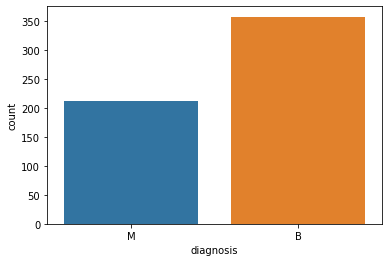

In [5]:
ax=sns.countplot(data['diagnosis'],label="Count")
B,M =data['diagnosis'].value_counts()
print("Benign",B)
print("Malignanat",M)

In [6]:
X=data.iloc[:,2:].values
y=data.iloc[:,1].values

In [7]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder
label_y= LabelEncoder()
y = label_y.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [11]:
classifier =Sequential()
classifier.add(Dense(units=16,activation='relu',input_dim=30))
classifier.add(Dense(units=8,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

In [12]:
classifier.compile(optimizer ='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [13]:
classifier.fit(X_train,Y_train,batch_size=100,epochs=150)


Epoch 1/150
5/5 [==============================] - 1s 3ms/step - loss: 0.7274 - accuracy: 0.4901
Epoch 2/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.5736
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.6549
Epoch 4/150
5/5 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.7407
Epoch 5/150
5/5 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.8044
Epoch 6/150
5/5 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.8286
Epoch 7/150
5/5 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8637
Epoch 8/150
5/5 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8879
Epoch 9/150
5/5 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.9055
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.9209
Epoch 11/150
5/5 [===========

In [14]:
y_pred =classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [16]:
cm

array([[65,  2],
       [ 2, 45]])

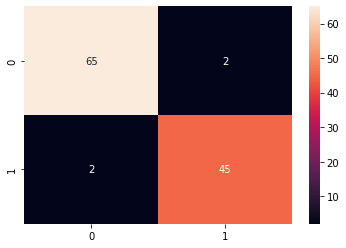

In [17]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [19]:
# k cross validation

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense


In [21]:
def built_clasifier():
  classifier =Sequential()
  classifier.add(Dense(units=16,activation='relu',input_dim=30))
  classifier.add(Dense(units=8,activation='relu'))
  classifier.add(Dense(units=1,activation='sigmoid'))
  classifier.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_clasifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=Y_train, cv=10, n_jobs=-1)

In [22]:
accuracies

array([1.        , 0.97826087, 1.        , 0.95652175, 0.93478262,
       0.95555556, 0.97777778, 1.        , 1.        , 1.        ])

In [23]:
accuracies.mean()

0.9802898585796356

In [24]:
accuracies.std()

0.022804588779426854

In [25]:
# paramitter tuning 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV


def built_clasifier(optimizer='adam'):
  classifier =Sequential()
  classifier.add(Dense(units=16,activation='relu',input_dim=30))
  classifier.add(Dense(units=8,activation='relu'))
  classifier.add(Dense(units=1,activation='sigmoid'))
  classifier.compile(optimizer =optimizer ,loss='binary_crossentropy',metrics=['accuracy'])
  return classifier


In [26]:
classifier = KerasClassifier(build_fn= built_clasifier)
parameters={'batch_size' :[100,150],'epochs':[100,200],"optimizer": ['adam','rmsproop']}  

grid_search =GridSearchCV(estimator=classifier,param_grid= parameters,scoring ='accuracy', cv=10)
grid_search = grid_search.fit(X_train,Y_train)
best_parameter = grid_search.best_params_
best_accuracy=grid_search.best_score_

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8578 - accuracy: 0.3178
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7733 - accuracy: 0.4352
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7049 - accuracy: 0.5721
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.6577
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.7042
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5506 - accuracy: 0.7604
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5102 - accuracy: 0.7873
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.8337
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.8484
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8826
Epoch 11/100
5/5 [===========

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown optimizer: rmsproop. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

  FitFailedWarning)


Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 1s 5ms/step - loss: 0.7193 - accuracy: 0.5829
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.6049
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6620 - accuracy: 0.6220
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6358 - accuracy: 0.6439
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6099 - accuracy: 0.6902
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5872 - accuracy: 0.7220
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5640 - accuracy: 0.7732
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5421 - accuracy: 0.7927
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5220 - accuracy: 0.8220
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5029 - accurac

In [27]:
best_parameter

{'batch_size': 150, 'epochs': 200, 'optimizer': 'adam'}

In [28]:
best_accuracy

0.9802415458937197